##### 7. Отбор признаков. Мультиколлинеарность
→ Ещё одним важным этапом в жизненном цикле машинного обучения и в проектировании признаков является отбор признаков.

*Отбор признаков — процесс выбора важных признаков, наиболее влияющих на предсказание.*
Например, если бы мы делали отбор признаков для задачи сомелье винных обзоров, мы бы отобрали те признаки, что больше всего влияют на рейтинг вина.

##### Для чего необходимо отбирать признаки?
Отбор признаков помогает:
1. Сократить время обучения. Чем меньше данных, тем быстрее обучается модель. Например, в скоринговых моделях часто количество признаков на этапе проектирования составляет больше 500, и дата-сайентисты делают отбор признаков, чтобы исключить те признаки, которые вносят наименьший вклад. В редких случаях количество признаков в модели может быть больше 100.
2. Повысить качество предсказания. Избыточные данные могут снижать точность предсказания, могут выступать в качестве «шума». Это явление называют мультиколлинеарностью, которую мы изучим ниже. Мы уже говорили о «проклятии размерности» в юните Работа с пропусками: методы обработки.

##### Как понять, какие признаки больше всего влияют на предсказание?
Существует множество методов для отбора признаков. Однако для их использования необходимо понимать такие понятия, как *значимость, критерий значимости, гипотеза*. С этими понятиями вы познакомитесь в следующем модуле про выдвижение гипотез. 
Однако есть и ещё один способ отобрать признаки для обучения — *корреляция*, которую вы изучили в модуле EDA-2. Математическая статистика в контексте EDA Юнит 3. Корреляция.

*В этом юните мы рассмотрим такое понятие, как *мультиколлинеарность* и её связь с отбором признаков.*
*Мультиколлинеарность — сильная корреляционная связь между признаками, отбираемыми для обучения.* 

Сильно скоррелированные признаки сообщают для модели одну и ту же информацию. Поэтому для обучения не нужно использовать их все. Часть из них необходимо удалить из набора данных. 

*Некоторые модели плохо работают на данных с мультиколлинеарностью. Вы узнаете об этом позже в модулях про машинное обучение.*
Процесс корреляционного анализа и удаление сильно скоррелированных признаков относят к одному из методов отбора признаков.

Рассмотрим отбор признаков в Python. Для этого воспользуемся обучающим датасетом о цветках ириса.

Данные содержат 150 экземпляров ириса, по 50 экземпляров трех видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

1. sepal length — длина наружной доли околоцветника;
2. sepal width — ширина наружной доли околоцветника;
3. petal length — длина внутренней доли околоцветника;
4. petal width — ширина внутренней доли околоцветника.

✍️ На основании этого набора данных требуется построить модель, определяющую вид растения по данным измерений. 

In [9]:
# Прочитаем датасет и посмотрим на первые несколько строк.
import pandas as pd

iris = pd.read_csv('iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Будем исследовать признаки, которые могут влиять на variety 
— sepal.length, sepal.width, petal.length, petal.width.
Проведём корреляционный анализ датасета и используем для этого тепловую карту корреляций признаков.

<Axes: >

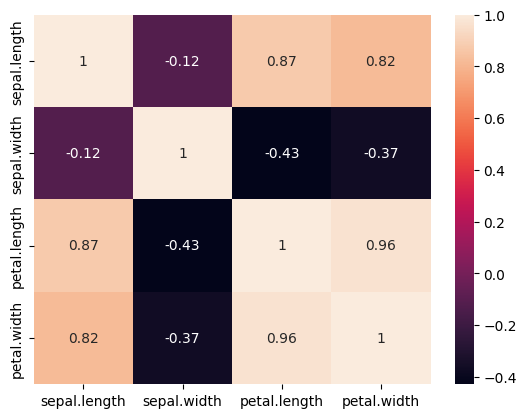

In [10]:
# импортируем seaborn для построения графиков
import seaborn as sns

# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(iris.corr(numeric_only=True), annot=True)

Чтобы построить модель на этом наборе данных, сделаем отбор признаков — удалим признаки с очень сильной корреляцией (где коэффициент корреляции +/-0.7 и выше).

Задание 7.1
Проанализируйте тепловую карту корреляций и ответьте на вопрос. Какие пары признаков датасета имеют сильную или очень сильную связь?

* sepal.length и petal.width
sepal.width и sepal.length
* petal.length и sepal.length
* petal.width и petal.length
petal.length и sepal.width

Пояснение
Выбираем из матрицы корреляций пары с признаков с корреляцией +/-0.7 и выше, это признаки: sepal.length и petal.width, petal.length и sepal.length, petal.width и petal.length.

In [11]:
# Как мы выяснили из тепловой карты корреляций, у нас есть три пары сильно скоррелированных признаков: sepal.length и petal.width, petal.length и sepal.length, petal.width и petal.length.
# Начнём с самого высокого коэффициента корреляции в паре признаков: petal.width и petal.length 0,96. Удалим любой признак из этой пары, например petal.width, так как он коррелирует ещё и с признаком sepal.length:
iris = iris.drop(['petal.width'], axis=1)
# Однако второй признак petal.length из этой пары также сильно коррелирует с признаком sepal.length. Удалим и его:
iris = iris.drop(['petal.length'], axis=1)
# Посмотрим на результат:
iris.head()

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa


У нас осталось всего два признака с коэффициентом корреляции -0.12: *sepal.width и sepal.length*, и признак, который необходимо предсказать — variety. Связь между оставшимися признаками очень слабая, поэтому эти признаки будут включены в итоговый набор данных для обучения.

*Это означает, что всего два признака — sepal length (длина наружной доли околоцветника) и sepal width (ширина наружной доли околоцветника) сообщают модели то же самое, что и исходный набор признаков. Мы уменьшили количество признаков, не потеряв при этом информацию о данных. А признаки petal length (длина внутренней доли околоцветника) и petal width (ширина внутренней доли околоцветник) сообщают лишнюю информацию для модели. Значит, они не нужны для построения модели.*

Таким образом, анализ мультиколлинеарности и исключение сильно скоррелированных признаков помогает отобрать признаки для модели, уменьшить количество признаков, исключить повторяющуюся информацию.

##### Какой признак удалять?

Как понять, какой признак необходимо удалить из пары скоррелированных признаков?
Вы можете удалить любой признак из пары. Однако вы можете оставить в наборе данных тот признак, который легче будет использовать в дальнейшем. Например, для него не понадобится округление или нормализация. 

Корреляция между исходным признаком sepal.length и новым признаком sepal.length.round составила 0.94. При отборе признаков один из них необходимо удалить. В этом случае лучше выбрать sepal.length.round, так как с целым числом удобнее работать.
Подобные критерии для удаления вы можете выбирать самостоятельно для удобства работы с признаками.

Задание 7.2
Отбор признаков — это…

удаление признаков из набора данных
процесс извлечения новых признаков
* процесс выбора самых важных признаков
отбор самых скоррелированых признаков

Пояснение
При отборе признаков действительно удаляются данные, но главная цель этого этапа — отбор самых важных признаков. Новые признаки создаются на этапе создания признаков, а самые скоррелированные, наоборот, удаляются из датасета.

Задание 7.3
Какие из признаков имеют самую сильную корреляционную связь?

price и points
* price и price_round
taster_name_1 и taster_name_2
is_italy и is_france

Пояснение
Построим матрицу корреляций data.corr() и выберем признак с самой высокой корреляцией, этоpriceprice и price_round.

<Axes: >

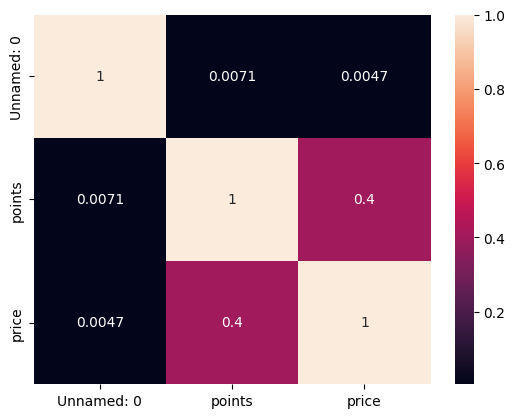

In [18]:
# data.corr()
sns.heatmap(data.corr(numeric_only=True), annot=True)

Задание 7.4 (Самопроверка)
Проведите корреляционный анализ всего набора данных и отберите только необходимые признаки для предсказания рейтинга вина.
❗️ Удалять признак рейтинг — points нельзя!
❗️ Для простоты вычислений можете использовать только корреляцию Пирсона.

1. Подсказка (1 из 2): Постройте тепловую матрицу корреляций для всех признаков. Найдите самые сильно скоррелированные пары. Удалите из этих пар по одному признаку.
2. Подсказка (2 из 2): Сильно скорелированные признаки — это признаки с коэффициентом корреляции +/-0.7 и выше.

In [120]:
# Прочитаем датасет и посмотрим на первые несколько строк.
import pandas as pd

df_w = pd.read_csv('wine_cleared.csv')
df_w.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [121]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
df_w['year'] = df_w['title'].str.findall(regex).str.get(0)
df_w.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Станислав\AppData\Local\Temp\ipykernel_11176\386661688.py:1: SyntaxWarning: invalid escape sequence '\d'
  regex = '\d{4}' # регулярное выражение для нахождения чисел


,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012


In [97]:
import category_encoders as ce

In [123]:
ord_encoder = ce.OrdinalEncoder()

In [124]:
year_col = ord_encoder.fit_transform(df_w['year'])
df_w = pd.concat([df_w, year_col], axis = 1)

In [125]:
country_col = ord_encoder.fit_transform(df_w['country'])
df_w = pd.concat([df_w, country_col], axis = 1)

In [126]:
description_col = ord_encoder.fit_transform(df_w['description'])
df_w = pd.concat([df_w, description_col], axis = 1)

In [127]:
designation_col = ord_encoder.fit_transform(df_w['designation'])
df_w = pd.concat([df_w, designation_col], axis = 1)

In [128]:
province_col = ord_encoder.fit_transform(df_w['province'])
df_w = pd.concat([df_w, province_col], axis = 1)

In [129]:
region_1_col = ord_encoder.fit_transform(df_w['region_1'])
df_w = pd.concat([df_w, region_1_col], axis = 1)

In [130]:
taster_name_col = ord_encoder.fit_transform(df_w['taster_name'])
df_w = pd.concat([df_w, taster_name_col], axis = 1)

In [131]:
taster_twitter_handle_col = ord_encoder.fit_transform(df_w['taster_twitter_handle'])
df_w = pd.concat([df_w, taster_twitter_handle_col], axis = 1)

In [132]:
title_col = ord_encoder.fit_transform(df_w['title'])
df_w = pd.concat([df_w, title_col], axis = 1)

In [133]:
variety_col = ord_encoder.fit_transform(df_w['variety'])
df_w = pd.concat([df_w, variety_col], axis = 1)

In [134]:
winery_col = ord_encoder.fit_transform(df_w['winery'])
df_w = pd.concat([df_w, winery_col], axis = 1)

<Axes: >

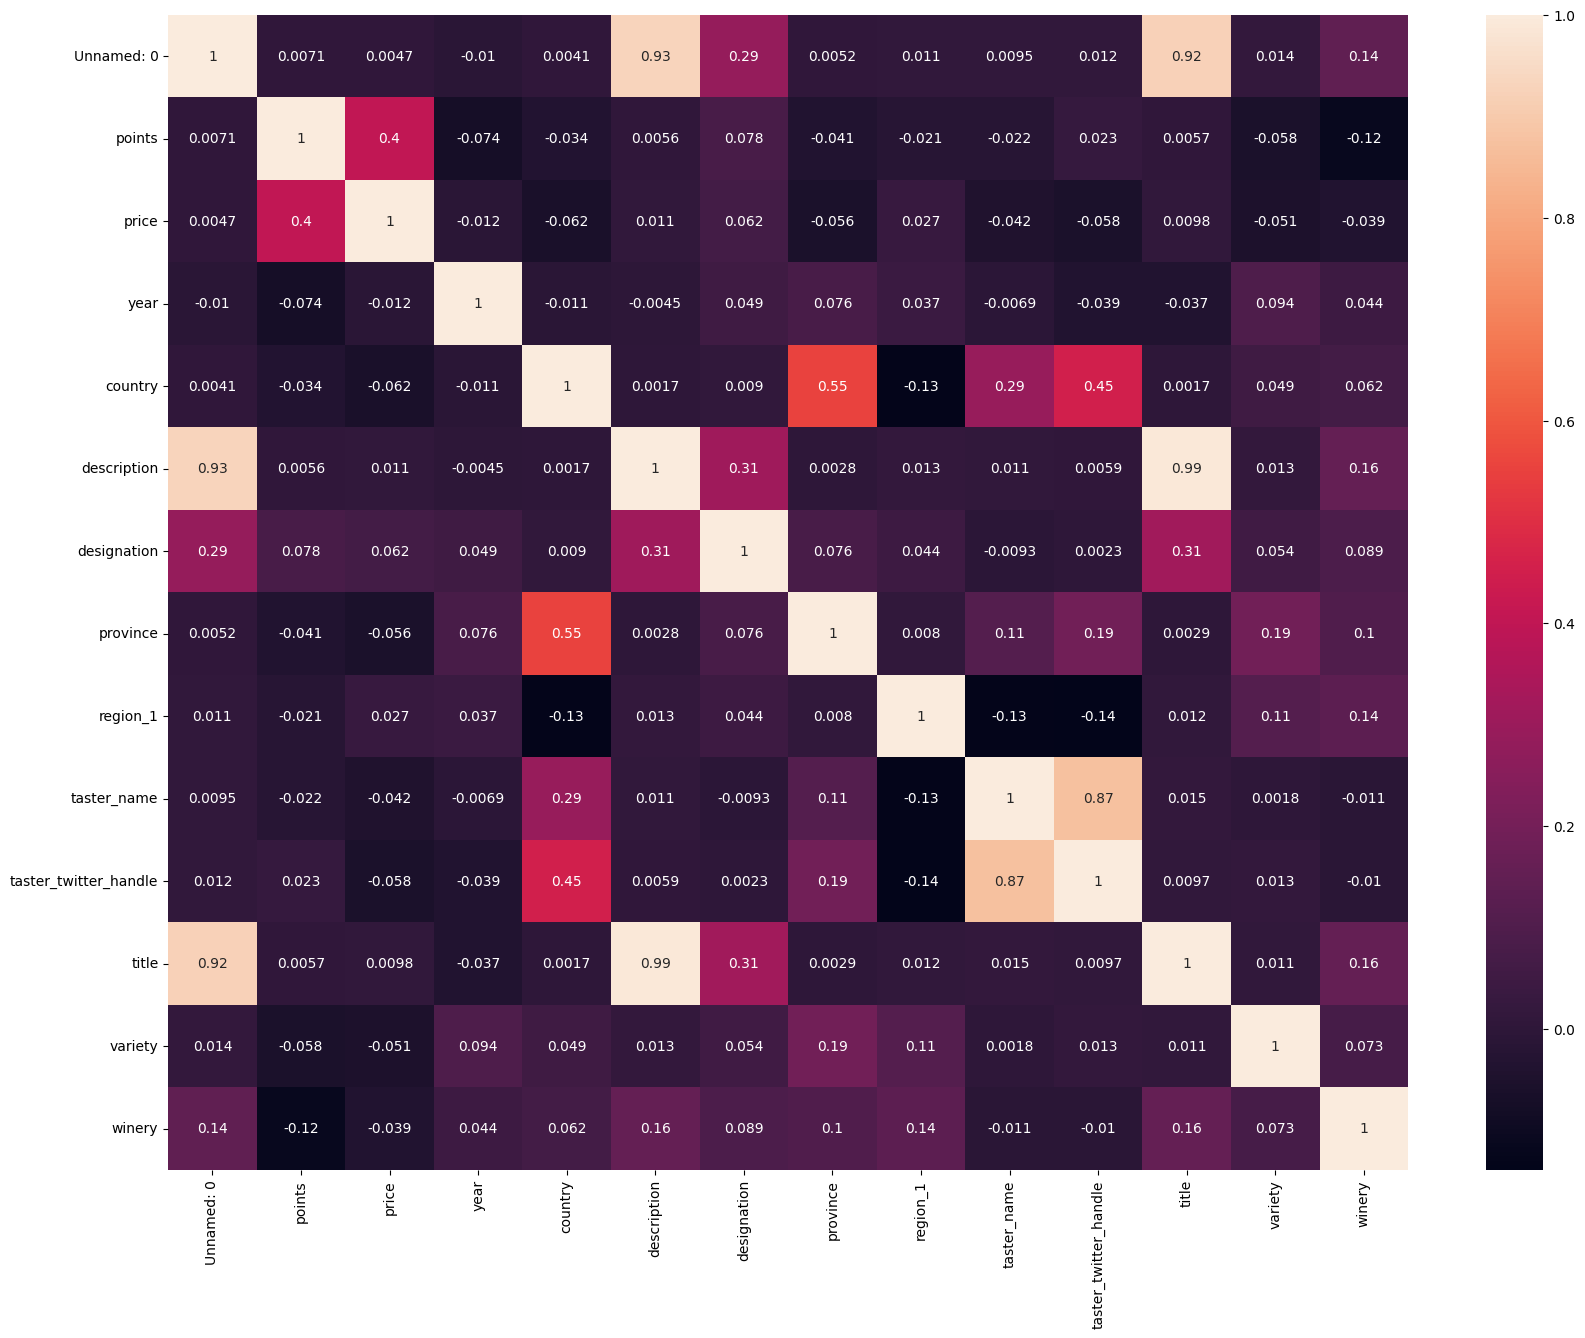

In [138]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df_w.corr(numeric_only=True), annot=True)

In [139]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  year                   125362 non-null  object 
 14  year                   129971 non-nu

В этом юните мы узнали, что такое отбор признаков и мультиколлинеарность, а также научились отбирать признаки путём исключения сильно скоррелированных признаков для дальнейшего построения модели. В следующем юните мы закрепим знания из юнитов проектирования признаков на практической задаче.

import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр г

import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df_w, plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df_w) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр г

In [112]:
df_m = pd.read_csv('model.csv')
df_m

,Month,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
0,December,1953,24.000000,36.000000,65.000000,118.000000,19.630000,0.670000
1,January,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
2,February,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
3,March,1954,24.000000,35.000000,66.000000,118.000000,19.040000,0.690000
4,April,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
...,...,...,...,...,...,...,...,...
657,September,2008,25.000000,36.000000,67.000000,115.000000,18.010000,0.690000
658,October,2008,24.000000,34.000000,65.000000,115.000000,19.130000,0.710000
659,November,2008,21.000000,32.000000,66.000000,108.000000,17.430000,0.660000
660,December,2008,25.000000,35.000000,68.000000,115.000000,17.480000,0.710000


<Axes: >

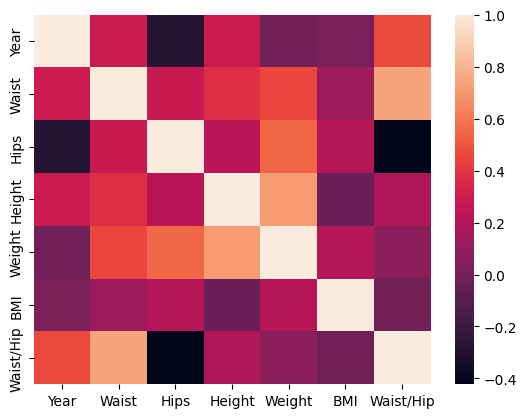

In [113]:
sns.heatmap(df_m.corr(numeric_only=True))

In [ ]:
# Построим график корреляции всех величин. Для простоты воспользуемся корреляцией Пирсона.# работа с визуализацией 
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

# Удалим самые сильно скоррелированные пары
data = data.drop(['is_usa', 'is_france', 'is_italy', 'price_round', 'area'], axis=1)

# Проверяем, что сильно скоррелированных признаков не осталось
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)
